In [1]:
%matplotlib inline

In [2]:
import datajoint as dj
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
from table_classes import Documents, ConvertedDocuments, BoxedImages 

[2023-03-16 10:10:58,524][INFO]: Connecting root@localhost:3306
[2023-03-16 10:10:58,567][INFO]: Connected root@localhost:3306


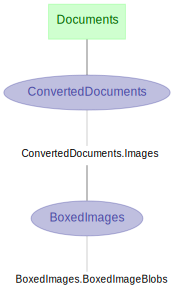

In [3]:
schema = dj.Schema("exxonmobile")
dj.Diagram(schema)

In [4]:
Documents()

document_id unique id for document,datetime time document was imported into table,file_name document filename


In [6]:
ConvertedDocuments.Images()

document_id unique id for document,image_number,image
0,1,=BLOB=
0,2,=BLOB=
0,3,=BLOB=
0,4,=BLOB=
0,5,=BLOB=


In [7]:
image1 = (ConvertedDocuments.Images & 'image_number=1').fetch1('image')

In [8]:

boxed_image = Image.open(io.BytesIO(image1))

# # Display the image using Image.show() method (opens the image in the default image viewer)
boxed_image.show()

# Or display the image in a Jupyter notebook with %matplotlib inline

# plt.imshow(boxed_image)
# plt.axis('off')
# plt.show()

In [9]:
BoxedImages.BoxedImageBlobs()

document_id unique id for document,image_number,box_number,boxed_image
0,1,1,=BLOB=
0,1,2,=BLOB=
0,1,3,=BLOB=
0,1,4,=BLOB=
0,1,5,=BLOB=
0,1,6,=BLOB=
0,1,7,=BLOB=
0,1,8,=BLOB=
0,1,9,=BLOB=
0,1,10,=BLOB=


In [14]:
image2 = (BoxedImages.BoxedImageBlobs & 'image_number=1' & 'box_number=13').fetch1('boxed_image')

In [15]:
# Convert the boxed_image_blob back to an image
boxed_image = Image.open(io.BytesIO(image2))

# # Display the image using Image.show() method (opens the image in the default image viewer)
boxed_image.show()

# Or display the image in a Jupyter notebook with %matplotlib inline
# plt.imshow(boxed_image)
# plt.axis('off')
# plt.show()

In [4]:
Documents.drop()

[2023-03-16 10:10:23,000][INFO]: `exxonmobile`.`documents` (0 tuples)
[2023-03-16 10:10:23,010][INFO]: `exxonmobile`.`_converted_documents` (0 tuples)
[2023-03-16 10:10:23,016][INFO]: `exxonmobile`.`_converted_documents__images` (0 tuples)
[2023-03-16 10:10:23,023][INFO]: `exxonmobile`.`_boxed_images` (0 tuples)
[2023-03-16 10:10:23,031][INFO]: `exxonmobile`.`_boxed_images__boxed_image_blobs` (0 tuples)
[2023-03-16 10:10:25,142][INFO]: Dropped table `exxonmobile`.`_boxed_images__boxed_image_blobs`
[2023-03-16 10:10:25,157][INFO]: Dropped table `exxonmobile`.`_boxed_images`
[2023-03-16 10:10:25,169][INFO]: Dropped table `exxonmobile`.`_converted_documents__images`
[2023-03-16 10:10:25,179][INFO]: Dropped table `exxonmobile`.`_converted_documents`
[2023-03-16 10:10:25,188][INFO]: Dropped table `exxonmobile`.`documents`
[2023-03-16 10:10:25,192][INFO]: Tables dropped. Restart kernel.
